In [ ]:
""""" Признаки:1.satisfaction_level - Уровень удовлетворенности работой
    2.last_evaluation - Время с момента последней оценки в годах
    3.number_project - Количество проектов, выполненных за время работы
    4.average_montly_hours - Среднее количество часов на рабочем месте в месяц
    5.time_spend_company - Стаж работы в компании в годах
    6.work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
    7.left - уволился ли сотрудник
    8.promotion_last_5years - повышался ли сотрудник за последние пять лет
    9.department - отдел, в котором работает сотрудник
    10.salary - относительный уровень зарплаты
    Требуется выполнить следующее задание:
        + 1 Загрузите файл HR.csv в pandas dataframe
        + 2 Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).
        +-3 Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.
        Определите две самые скоррелированные и две наименее скоррелированные переменные.
        + 4 Рассчитайте сколько сотрудников работает в каждом департаменте.
        + 5 Показать распределение сотрудников по зарплатам.
        + 6 Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности
        + 7 Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, 
        чем сотрудники с низким окладом
        +-8 Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
        -Доля сотрудников с повышением за последние 5 лет
        -Средняя степень удовлетворенности
        -Среднее количество проектов
        +-9 Разделить данные на тестовую и обучающую выборки
        Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов 
        (кроме department и salary).Оценить качество модели на тестовой выборки
        + 10 Загрузить jupyter notebook с решение на github и прислать ссылку"""
        

# 1.Загрузите файл HR.csv в pandas dataframe

In [37]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('HR.csv')
df.head(8000)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
7995,0.70,0.85,3,161,2,0,0,0,technical,medium
7996,0.73,0.62,3,171,3,0,0,0,management,medium
7997,0.61,0.86,4,153,5,0,0,0,IT,medium
7998,0.95,0.96,4,161,2,0,0,0,IT,high


In [3]:
df.info() # смотрим из чего состоит файл с данными и какого типа данные в столбцах

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df.isnull().any() # данные качественные полные без пропусков

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
department               False
salary                   False
dtype: bool

In [5]:
df.describe() # смотрим описание значений и макимальные/минимальные значения по столбцам

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
#Изучаем столбец "отделы"
department=list(df['department'].unique()) # смотрим  сколько уникальных названий отделов в столбце "department"
len(department)

10

In [8]:
# изучаем столбец "salary"
salary=list(df['salary'].unique()) # смотрим  сколько уникальных названий отделов в столбце "department"
len(salary)

3

In [9]:
df_salary=pd.DataFrame(salary)
df_salary # смотрим какой тип зарплат в столбце "зарплата"

,0
0,low
1,medium
2,high


In [ ]:
# Столбец left - это качественные данные, не несмотря на то, что мы видим переменную с результатами 1 и 0.
# 1 - это сотрудники, покинувшие компанию, 0 - это для те, кто этого не сделал.

# 2.Рассчитаем основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).

In [10]:
#Изучаем данные по столбцу "Уровень удовлетворенности работой"
print(df['satisfaction_level'].min())
print(df['satisfaction_level'].max())
print(df['satisfaction_level'].median())
print(df['satisfaction_level'].std())
mean_satisfaction_level = sum(df['satisfaction_level']) / len(df['satisfaction_level'])
print (mean_satisfaction_level)

0.09
1.0
0.64
0.2486306510611418
0.6128335222348166


In [11]:
#Изучаем данные по столбцу "Время с момента последней оценки в годах"
print(df['last_evaluation'].min())
print(df['last_evaluation'].max())
print(df['last_evaluation'].median())
print(df['last_evaluation'].std())
mean_last_evaluation = sum(df['last_evaluation']) / len(df['last_evaluation'])
print (mean_last_evaluation)

0.36
1.0
0.72
0.17116911062327592
0.7161017401159978


In [12]:
#Изучаем данные по столбцу "Количество проектов, выполненных за время работы"
print(df['number_project'].min())
print(df['number_project'].max())
print(df['number_project'].median())
print(df['number_project'].std())
mean_number_project = sum(df['number_project']) / len(df['number_project'])
print (mean_number_project)

2
7
4.0
1.2325923553183857
3.80305353690246


In [13]:
#Изучаем данные по столбцу "Среднее количество часов на рабочем месте в месяц"
print(df['average_montly_hours'].min())
print(df['average_montly_hours'].max())
print(df['average_montly_hours'].median())
print(df['average_montly_hours'].std())
mean_average_montly_hours = sum(df['average_montly_hours']) / len(df['average_montly_hours'])
print (mean_average_montly_hours)

96
310
200.0
49.943099371284305
201.0503366891126


In [14]:
#Изучаем данные по столбцу "Стаж работы в компании в годах"
print(df['time_spend_company'].min())
print(df['time_spend_company'].max())
print(df['time_spend_company'].median())
print(df['time_spend_company'].std())
mean_time_spend_company = sum(df['time_spend_company']) / len(df['time_spend_company'])
print (mean_time_spend_company)

2
10
3.0
1.4601362305354546
3.498233215547703


In [ ]:
# По столбцу 6"work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником" и 
# по столбцу 7 "left - уволился ли сотрудник" искать макс, мин, среднее, моду и медиану не представляется возможным,
# т.к данные хоть и выглядят количественными описывают качественный характер 1- уволился, 0 - нет

# 3.Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

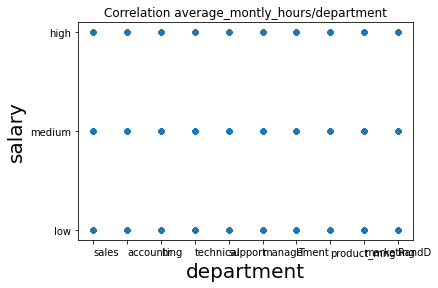

In [15]:
# Можно последовательно строить графики корреляции одной переменной от другой (одного столбца от другого), 
# чтобы наглядно на визуализации увидеть корреляцию  или ее отсутствие
df.plot(kind='scatter', 
        x='department', 
        y='salary', 
        title='Correlation average_montly_hours/department')
plt.xticks(rotation=0,ha='left')
plt.xlabel('department',fontsize=20)
plt.ylabel('salary',fontsize=20)
plt.show()

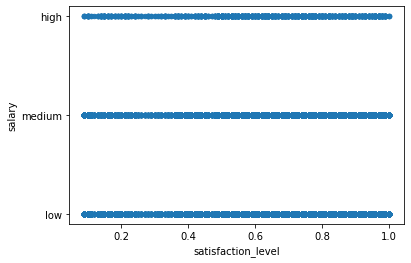

In [16]:
df.plot(kind='scatter', x='satisfaction_level', y='salary') 

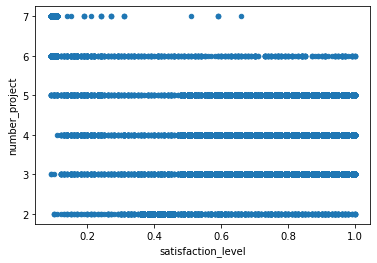

In [17]:
df.plot(kind='scatter', x='satisfaction_level', y='number_project') 

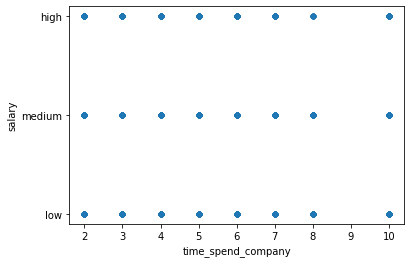

In [18]:
df.plot(kind='scatter', x='time_spend_company', y='salary') 

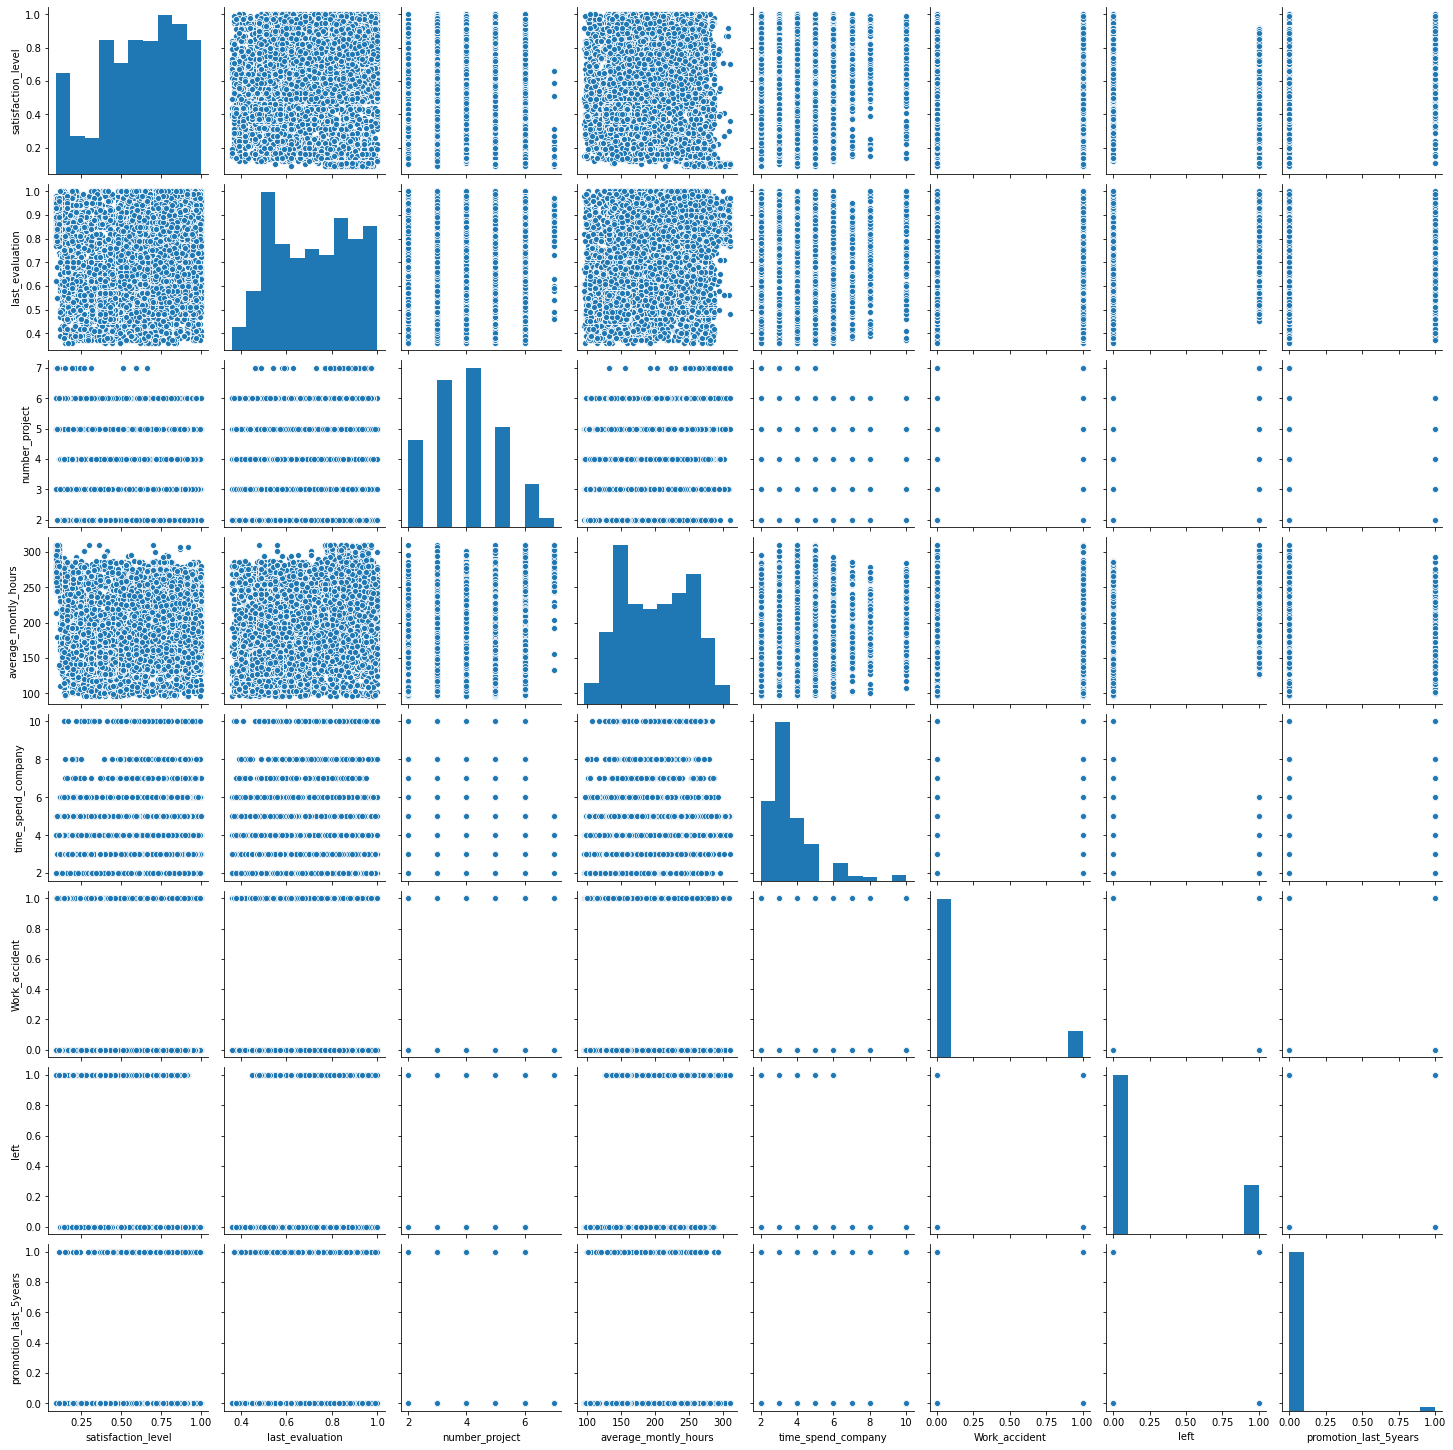

In [19]:
# А можно построить все графики сразу)))
sns.pairplot(df) # используем pairplot для изучения взаимосвязи множественных признаков

In [ ]:
#Таким образом видим, что наиболее скоррелированные переменные это satisfaction_level и average_montly_hours;
#satisfaction_level и last_evaluation

# 4. Рассчитайте сколько сотрудников работает в каждом департаменте.

In [28]:
#Изучаем столбец "отделы"
department=list(df['department'].unique()) # смотрим  сколько уникальных названий отделов в столбце "department"
len(department)

10

In [27]:
df_department=pd.DataFrame(department)
df_department # смотрим какие именно отделы присутствуют в столбце

,0
0,sales
1,accounting
2,hr
3,technical
4,support
5,management
6,IT
7,product_mng
8,marketing
9,RandD


In [33]:
print(sum(df['department']=='sales')) #сколько сотрудников работают в отделе "Продаж"
print(sum(df['department']=='accounting'))  #сколько сотрудников работают в отделе "Сопровождения"
print(sum(df['department']=='hr')) #сколько сотрудников работают в "Отделе кадров"
print(sum(df['department']=='technical')) #сколько сотрудников работают в отделе "Техническая служба"
print(sum(df['department']=='support')) #сколько сотрудников работают в отделе "Служба поддержки"
print(sum(df['department']=='IT')) #сколько сотрудников работают в отделе "Программисты"
print(sum(df['department']=='product_mng')) #сколько сотрудников работают в отделе "Продакт менеджеры"
print(sum(df['department']=='marketing'))  #сколько сотрудников работают в отделе "Маркетинг"
print(sum(df['department']=='RandD')) #сколько сотрудников работают в отделе "Корпорация(Управление)"

4140
767
739
2720
2229
1227
902
858
787


# 5 Показать распределение сотрудников по зарплатам.

In [34]:
# изучаем столбец "salary"
salary=list(df['salary'].unique()) # смотрим  сколько уникальных названий отделов в столбце "department"
len(salary)

3

In [35]:
df_salary=pd.DataFrame(salary)
df_salary # смотрим какое обозначение типа зарплат в столбце "зарплата",
# т.е видим позиции "низкий уровень зп = low", "средний уровень зп = medium", "высокий уровень зп = high"

,0
0,low
1,medium
2,high


In [37]:
# Результат количество человек-сотрудников получающих определенный уровень зарплаты
print(sum(df['salary']=='low')) 
print(sum(df['salary']=='medium'))
print(sum(df['salary']=='high')) 

7316
6446
1237


# 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [58]:
# Распределение по зарплатам в "Отделе Продаж", результат количество человек получающих уровень зарплаты
print(sum((df['department'] == 'sales') & (df['salary']=='low')))
print(sum((df['department'] == 'sales') & (df['salary']=='medium')))
print(sum((df['department'] == 'sales') & (df['salary']=='high')))

2099
1772
269


In [59]:
# Распределение по зарплатам в Отделе "Сопровождения", результат количество человек-сотрудников получающих определенный уровень зарплаты
print(sum((df['department'] == 'accounting') & (df['salary']=='low')))
print(sum((df['department'] == 'accounting') & (df['salary']=='medium')))
print(sum((df['department'] == 'accounting') & (df['salary']=='high')))

358
335
74


In [60]:
# Распределение по зарплатам в "Отделе Кадров", результат количество человек-сотрудников, получающих определенный уровень зарплаты
print(sum((df['department'] == 'hr') & (df['salary']=='low')))
print(sum((df['department'] == 'hr') & (df['salary']=='medium')))
print(sum((df['department'] == 'hr') & (df['salary']=='high')))

335
359
45


In [61]:
# Распределение по зарплатам в Отделе "Техническаяя служба", результат количество человек-сотрудников, получающих определенный уровень зарплаты
print(sum((df['department'] == 'technical') & (df['salary']=='low')))
print(sum((df['department'] == 'technical') & (df['salary']=='medium')))
print(sum((df['department'] == 'technical') & (df['salary']=='high')))

1372
1147
201


In [62]:
# Распределение по зарплатам в Отделе "Служба поддержки", результат количество человек-сотрудников, получающих определенный уровень зарплаты
print(sum((df['department'] == 'support') & (df['salary']=='low')))
print(sum((df['department'] == 'support') & (df['salary']=='medium')))
print(sum((df['department'] == 'support') & (df['salary']=='high')))

1146
942
141


In [63]:
# Распределение по зарплатам в Отделе "Программисты", результат количество человек-сотрудников, получающих определенный уровень зарплаты
print(sum((df['department'] == 'IT') & (df['salary']=='low')))
print(sum((df['department'] == 'IT') & (df['salary']=='medium')))
print(sum((df['department'] == 'IT') & (df['salary']=='high')))

609
535
83


In [64]:
# Распределение по зарплатам в Отделе "Продакт менеджеры", результат количество человек-сотрудников, получающих определенный уровень зарплаты
print(sum((df['department'] == 'product_mng') & (df['salary']=='low')))
print(sum((df['department'] == 'product_mng') & (df['salary']=='medium')))
print(sum((df['department'] == 'product_mng') & (df['salary']=='high')))

451
383
68


In [65]:
# Распределение по зарплатам в Отделе "Маркетинг", результат количество человек-сотрудников, получающих определенный уровень зарплаты
print(sum((df['department'] == 'marketing') & (df['salary']=='low')))
print(sum((df['department'] == 'marketing') & (df['salary']=='medium')))
print(sum((df['department'] == 'marketing') & (df['salary']=='high')))

402
376
80


In [66]:
# Распределение по зарплатам в Отделе "Корпорация(Управление)", результат количество человек-сотрудников, получающих определенный уровень зарплаты
print(sum((df['department'] == 'RandD') & (df['salary']=='low')))
print(sum((df['department'] == 'RandD') & (df['salary']=='medium')))
print(sum((df['department'] == 'RandD') & (df['salary']=='high')))

364
372
51


In [24]:
#Далее после изучения, но для упрощения потроения визулизаций, 
#уменьшим количество отделов, объединив “technical”, “support” and “IT” вместе и назовем их “technical”
import numpy as np 
df['department']=np.where(df['department'] =='support', 'technical', df['department']) 

In [38]:
df['department']=np.where(df['department'] =='IT', 'technical', df['department']) 
df.head(8000)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
7995,0.70,0.85,3,161,2,0,0,0,technical,medium
7996,0.73,0.62,3,171,3,0,0,0,management,medium
7997,0.61,0.86,4,153,5,0,0,0,technical,medium
7998,0.95,0.96,4,161,2,0,0,0,technical,high


# 7.Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [73]:
# На основании расчетов пункта 2 , т.к среднее значение по столбцу "Количество отработанных часов в месяц" = 200, 
# то принимаем это значение как поворотную точку
print(sum((df['average_montly_hours'] > 200) & (df['salary']=='high')))
# количество человек-сотрудников, кто работал больше 200 часов в месяц 

617


In [74]:
print(sum((df['average_montly_hours'] < 200) & (df['salary']=='high')))

619


In [75]:
print(sum((df['average_montly_hours'] > 200) & (df['salary']=='low')))

3608


In [76]:
print(sum((df['average_montly_hours'] < 200) & (df['salary']=='low')))

3677


In [77]:
# На основании расчетов пункта 2, т.к максимальное значение по столбцу "Количество отработанных часов в месяц" = 310, 
# посмотрим сколько количество человек? кто отработал около этих  максимальных часов, 
# но несмотря на это, получил низкую зарплату
print(sum((df['average_montly_hours'] > 300) & (df['salary']=='low')))

99


In [78]:
# посмотрим сколько количество человек? кто отработал около этих  максимальных часов и получил высокую зарплату
print(sum((df['average_montly_hours'] > 300) & (df['salary']=='high')))

2


In [ ]:
# Вывод отрабатывать большее количество часов, в надежде получить высокий уровень зарплаты, по статистике в этой компании не оправдывается

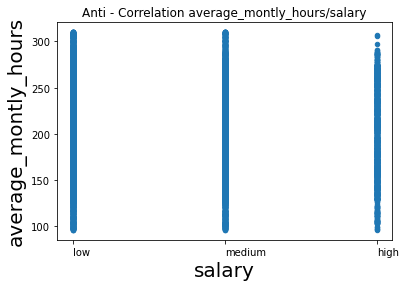

In [81]:
df.plot(kind='scatter', 
        x='salary', 
        y='average_montly_hours', 
        title='Anti - Correlation average_montly_hours/salary')
plt.xticks(rotation=0,ha='left')
plt.xlabel('salary',fontsize=20)
plt.ylabel('average_montly_hours',fontsize=20)
plt.show()
# Если рассматривать график то, видим что зависимость между зарплатой
# и количеством отработанных часов в месяц на работе отсутствует

# 8А.Рассчитать следующие показатели среди уволившихся сотрудников: 

In [101]:
#-Доля сотрудников с повышением за последние 5 лет
df.groupby('left')['promotion_last_5years'].sum()

left
0    300
1     19
Name: promotion_last_5years, dtype: int64

In [96]:
#-Средняя степень удовлетворенности
df.groupby('left')['satisfaction_level'].sum()

left
0    7620.30
1    1571.59
Name: satisfaction_level, dtype: float64

In [97]:
#-Среднее количество проектов
df.groupby('left')['number_project'].sum()

left
0    43274
1    13768
Name: number_project, dtype: int64

# 8Б.Рассчитать следующие показатели среди неуволившихся сотрудников:

In [103]:
#-Доля сотрудников с повышением за последние 5 лет

In [ ]:
#-Средняя степень удовлетворенности

In [ ]:
#-Среднее количество проектов

In [39]:
#количество сотрудников, покинувших компанию, и тех, кто этого не сделал:
df['left'].value_counts() 

0    11428
1     3571
Name: left, dtype: int64

In [ ]:
#Получается, что мы видим по данным, 3571 сотрудник уволился, а остались – 11428 сотрудников.
#т.е уходил каждый четвертый работник или 25% от общего чилса сотрудников

In [40]:
df.groupby('left').mean() # группировка уволившихся и оставшихся сотрудников

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [41]:
df.groupby('department').mean() #группировка значений по столбцам для категориальных переменных «department»

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
department,,,,,,,,
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
support,0.618300,0.723109,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973
technical,0.611082,0.719772,3.858880,202.409932,3.429187,0.138080,0.245756,0.007854


In [42]:
df.groupby('salary').mean() #группировка значений по столбцам для категориальных переменных «salary»

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
high,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205
low,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021
medium,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.204313,0.028079


In [ ]:
""""На основе данных и полученных расчетов из массива данных пункт 1,2,3,4,5,6,6,7,8 , 
делаю вывод о том, что
Средний уровень удовлетворенности тех сотрудников, кто работает в компании,
выше, чем тот же показатель у уволившихся работников.
Среднемесячные рабочие часы сотрудников, покинувших компанию, больше, чем у оставшихся сотрудников.
Сотрудники, у которых были несчастные случаи на рабочем месте, с меньшей вероятностью уходят, чем сотрудники, у которых не было несчастных случаев на производстве.
Сотрудники, которые были повышены за последние пять лет, с меньшей вероятностью уходят, чем те, кто не получил повышение в последние пять лет."""

# Визуализация выводов

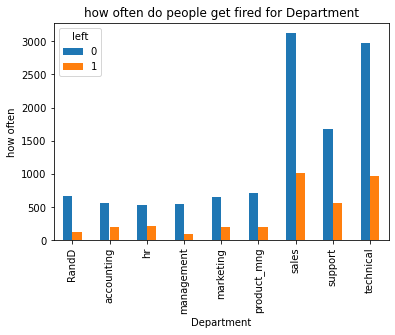

In [45]:
%matplotlib inline 
import matplotlib.pyplot as plt 
pd.crosstab(df.department,df.left).plot(kind='bar') 
plt.title('how often do people get fired for Department') 
plt.xlabel('Department') 
plt.ylabel('how often') 
plt.savefig('department_') 

In [ ]:
# Видно, что больше всего уходят из отдела продаж и из технического отдела. Это текучка объяснима вечно возрастающими планами продаж для отдела продаж; 
# тем что технические специалисты -программисты, it, разработчики - зачастую считают себя недооцененными при суперIQ,
# а специалистs колл0центра (слоужба поддержки) находятся "на передовой" при минимальной оплате.

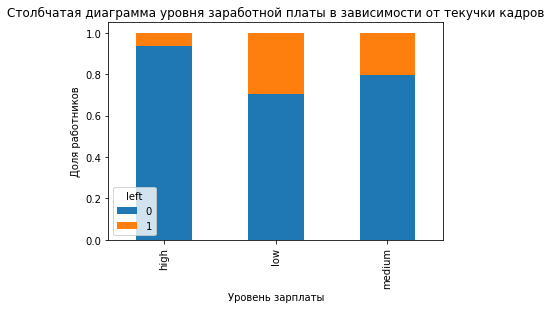

In [50]:
#График сменяемости кадров в зависимости от среднего уровня заработной платы
table=pd.crosstab(df.salary, df.left) 
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True) 
plt.title('Столбчатая диаграмма уровня заработной платы в зависимости от текучки кадров') 
plt.xlabel('Уровень зарплаты') 
plt.ylabel('Доля работников') 
plt.savefig('столбчатая диаграмма заработной платы') 

In [ ]:
#Видим, что доля текучки сотрудников во многом зависит от уровня их заработной платы;
# следовательно, уровень зарплаты может быть также хорошим предсказателем в прогнозировании результата увольнения или нет.

# 9.Разделить данные на тестовую и обучающую выборки. 
# Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)                                 # Оценить качество модели на тестовой выборки

In [133]:
# Построим модель линейной регрессии
# Реализация простой линейной регрессии начинается с заданным набором пар x-y. Эти пары – результаты наблюдений. 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

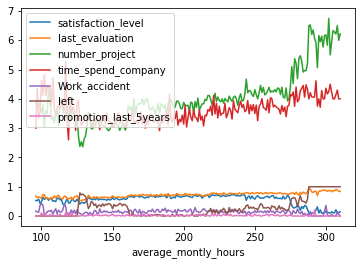

In [111]:
d = df.groupby('average_montly_hours').mean()
d.plot()

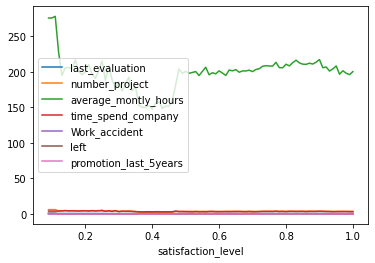

In [112]:
d = df.groupby('satisfaction_level').mean()
d.plot()

In [132]:
# Рассчитаем коэффициент корреляции Пирсона 
df[['satisfaction_level','average_montly_hours']].corr

<bound method DataFrame.corr of        satisfaction_level  average_montly_hours
0                    0.38                   157
1                    0.80                   262
2                    0.11                   272
3                    0.72                   223
4                    0.37                   159
...                   ...                   ...
14994                0.40                   151
14995                0.37                   160
14996                0.37                   143
14997                0.11                   280
14998                0.37                   158

[14999 rows x 2 columns]>

In [118]:
# Рассчитаем коэффициент корреляции Спирмена в df
df[['satisfaction_level','average_montly_hours']].corr(method = 'spearman')

,satisfaction_level,average_montly_hours
satisfaction_level,1.000,0.062
average_montly_hours,0.062,1.000


In [114]:
# Рассчитаем коэффициент корреляции Кенделла в df
df[['satisfaction_level','average_montly_hours']].corr(method = 'kendall')

,satisfaction_level,average_montly_hours
satisfaction_level,1.000000,0.051126
average_montly_hours,0.051126,1.000000


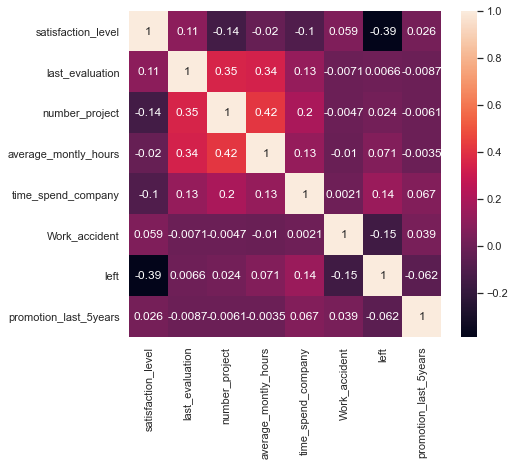

In [117]:
# строим тепловую карту 
sns.set(rc={'figure.figsize':(7.0,6.0)})
sns.heatmap(df.corr(),annot= True)

In [119]:
# Построим модель линейной регрессии 
X2 = df[['satisfaction_level']]
y2 = df['average_montly_hours']

In [120]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30, random_state=42)

In [121]:
X2_train.shape

(10499, 1)

In [122]:
y2_train.shape

(10499,)

In [123]:
model2 = LinearRegression()
model2.fit(X2_train, y2_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [124]:
model2.coef_

array([-5.87416405])

In [125]:
model2.intercept_

204.53227418820254

In [126]:
y2_pred = model2.predict(X2_test)
y2_pred

array([200.71406756, 199.36300983, 200.47910099, ..., 199.95042623,
       199.06930162, 200.7728092 ])

In [127]:
model2.score(X2_test, y2_test) # метод возвращает значение коэффициента детерминации

-0.001006859816415906

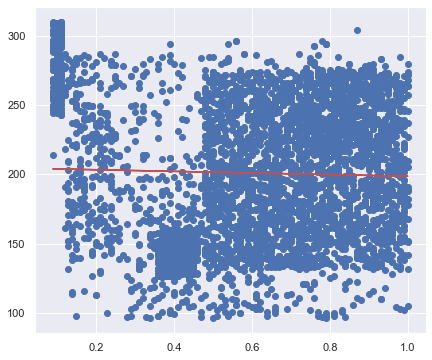

In [128]:
plt.scatter(X2_test, y2_test)
plt.plot(X2_test, y2_pred, c='r')
# видим нелинейную регрессию.
# связь между параметрами также отсутствует 

In [129]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [134]:
X2_const = sm.add_constant(X2_train) # техническая особенность библиотек, надо руками добавить константу

In [135]:
X2_const.shape

(10499, 2)

In [136]:
model2 = sm.OLS(y2_train, X2_const)
results = model2.fit()
print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     average_montly_hours   R-squared:                       0.001
Model:                              OLS   Adj. R-squared:                  0.001
Method:                   Least Squares   F-statistic:                     9.045
Date:                  Sun, 13 Dec 2020   Prob (F-statistic):            0.00264
Time:                          23:48:10   Log-Likelihood:                -55941.
No. Observations:                 10499   AIC:                         1.119e+05
Df Residuals:                     10497   BIC:                         1.119e+05
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const           

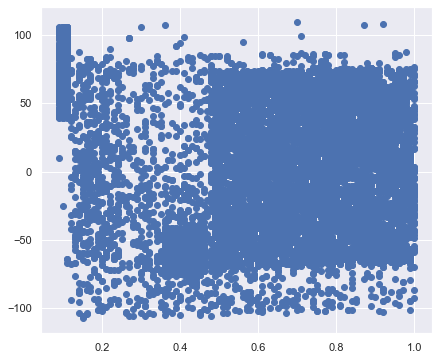

In [137]:
# посмотрим на остатки
plt.scatter(X2_const.iloc[:, 1], results.resid)

(array([ 235.,  768., 1884., 1272., 1171., 1175., 1394., 1568.,  848.,
         184.]),
 array([-107.65114958,  -85.92807056,  -64.20499154,  -42.48191251,
         -20.75883349,    0.96424553,   22.68732455,   44.41040358,
          66.1334826 ,   87.85656162,  109.57964065]),
 <a list of 10 Patch objects>)

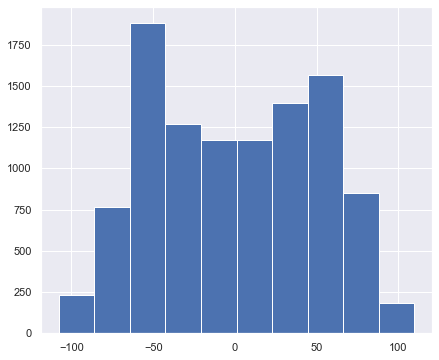

In [138]:
plt.hist(results.resid)

In [ ]:
#Ответ: линейной зависимости  нет 